# Machine Learning 
### Classification
### Created By Dawid Lisek

Package import:

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

1. Iris database - please divide into training and test sets

In [5]:
iris = datasets.load_iris()

#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

2. Find the best value of k for the selected test set (show on the graph change of k and the error - for both the test and training sets)

In [6]:
def knn(x_train, y_train , x_test, k):
    predicted = []
    for item in x_test: 
        distances = []
        for i in range(len(x_train)): 
            dist = distance.euclidean(np.array(x_train[i,:]) , item) 
            distances.append(dist) 
        distances = np.array(distances)
        k_nearest = np.argsort(distances)[:k] 
        labels = y_train[k_nearest]
        most_common = mode(labels) 
        most_common = most_common.mode[0]
        predicted.append(most_common)
    return predicted

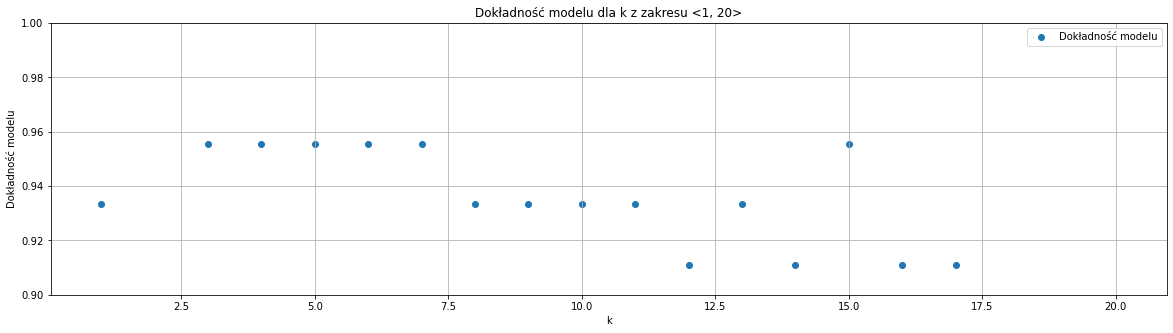

In [7]:
scores = []
for k in range(1, 21):
    y_pred = knn(features_train, labels_train, features_test, k)
    scores.append(accuracy_score(labels_test, y_pred))

plt.figure(figsize=(20, 5))
plt.scatter(range(1, 21), scores, label='Dokładność modelu')
plt.grid()
plt.ylim((0.90, 1.0))
plt.xlabel('k')
plt.ylabel('Dokładność modelu')
plt.legend()
plt.title('Dokładność modelu dla k z zakresu <1, 20>')
plt.show()


Wybieram k = 8. Dla takiego k dokładność modelu wynosi:

In [8]:
scores[7]

0.9333333333333333

### Ex. 2 - kNN - Python (sklearn)

Please solve the above problem using the library sklearn.neighbors.KNeighborsClassifier in order to check the correct implementation of the kNN algorithm.

For k = 8:

In [9]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(features_train, labels_train)
y_pred = neigh.predict(features_test)
print(f'Dokładność modelu dla k = 8 wynosi {accuracy_score(labels_test, y_pred)}')

Dokładność modelu dla k = 8 wynosi 0.9333333333333333


### Ex.3 - Decision trees

In [10]:
from sklearn import tree
import cv2
iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:1, :])


array([0])

In [11]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [12]:
from six import StringIO  
import pydot
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png("iris.png")

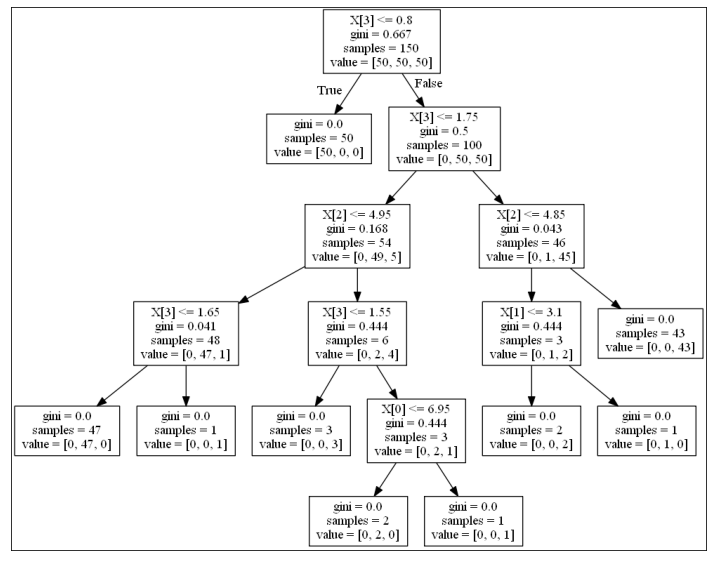

In [13]:
iris_png = cv2.imread('iris.png')
plt.figure(figsize=(40, 10))
plt.imshow(iris_png)
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
from scipy.io import loadmat
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [15]:
# wczytywanie danych
dane = loadmat('mnist.mat')

Pobrane przeze mnie dane zawierały obrazy w rozmiarze 28x28 pikseli oraz należało dokonań transpozycji macierzy y.

Ex.1.Divide the data into parameters X and answer y:

In [16]:
X = dane["trainX"]
y = dane["trainY"]

# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

Ex 2. Please display the number of digits and the number of pixels per image

In [17]:
digits_num, pixels_num = X.shape
digits_num, pixels_num

(60000, 784)

In [18]:
y.shape

(1, 60000)

In [19]:
y = y.T
y.shape

(60000, 1)

Ex. 3. Please display sample digits from the dataset (functionplot_mnist).

In [20]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [21]:
w, h = 28, 28

c:\Users\dawid\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


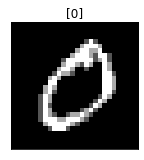

In [22]:
plot_mnist([X[1]], [y[1]], w, h, n_row=1, n_col=1)

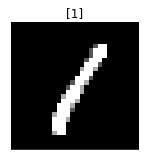

In [23]:
plot_mnist([X[3]], [y[3]], w, h, n_row=1, n_col=1)

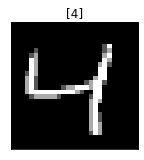

In [24]:
plot_mnist([X[2]], [y[2]], w, h, n_row=1, n_col=1)

Ex. 4. Please divide the dataset into learner (70%) and training.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Ex. 5. Create an instance of the classifier, then train and predict for test data.

In [26]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Ex 6. Please provide F1 result, confusion matrix and classification report.

In [27]:
f1_score(y_test, y_pred, average=None)

array([0.8922377 , 0.93728564, 0.7859944 , 0.77533279, 0.81701175,
       0.75880923, 0.87156223, 0.88717403, 0.78132388, 0.77676349])

In [28]:
confusion_matrix(y_test, y_pred)

array([[1569,    0,   65,   14,   19,   29,   23,   10,   23,    5],
       [   1, 1913,   27,   19,   13,    7,    8,   14,   32,   19],
       [  51,   24, 1403,   52,   45,   35,   53,   37,   75,   14],
       [  18,   17,   66, 1427,   35,  134,   15,   28,   46,   60],
       [   8,    8,   29,   13, 1460,   26,   14,   12,   23,  110],
       [  39,   15,   31,  129,   29, 1249,   47,   13,   40,   45],
       [  31,   10,   31,   18,   56,   45, 1537,    2,   66,    9],
       [   5,    6,   36,   39,   37,   25,    0, 1667,   15,   67],
       [  24,   29,   72,   62,   40,   50,   22,   10, 1322,   79],
       [  14,    7,   21,   62,  137,   55,    3,   68,   32, 1404]],
      dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1757
           1       0.94      0.93      0.94      2053
           2       0.79      0.78      0.79      1789
           3       0.78      0.77      0.78      1846
           4       0.78      0.86      0.82      1703
           5       0.75      0.76      0.76      1637
           6       0.89      0.85      0.87      1805
           7       0.90      0.88      0.89      1897
           8       0.79      0.77      0.78      1710
           9       0.77      0.78      0.78      1803

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000

